<a href="https://colab.research.google.com/github/mridulaswami/Prediction-using-supervised-ML/blob/main/Study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
## Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


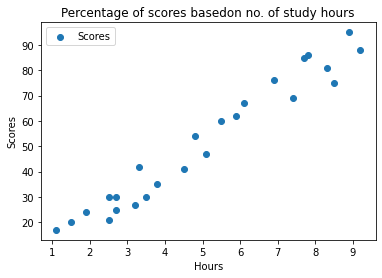

In [6]:
 ## Plotting the data and finding the relationships

plt.scatter(x='Hours',y='Scores',data=df)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Percentage of scores basedon no. of study hours')
plt.legend()
plt.show()


In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(20, 1) (5, 1) (20,) (5,)


In [10]:
## we will train the model on linear regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

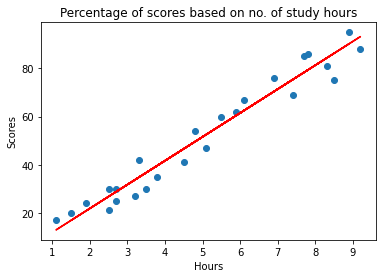

In [11]:
## Visualizing the model
regline = lin_reg.predict(x)
plt.scatter(x,y)
plt.plot(x,regline,color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Percentage of scores based on no. of study hours')
plt.show()

In [12]:
## we have trained our model. Now will predict the values
y_pred=lin_reg.predict(x_test)

In [13]:
# comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
## now will predict the score of a student who studies for 9.25 hrs/day
hours = 9.25
own_pred = lin_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('r2_score: ',r2_score(y_test,y_pred))

Mean Squared Error:  21.598769307217456
Mean Absolute Error:  4.183859899002982
r2_score:  0.9454906892105354
